In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("placement_dataset.csv")
df

,sr no.,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0
...,...,...,...,...
95,95,4.3,200,0
96,96,4.4,42,0
97,97,6.7,182,1
98,98,6.3,103,1


In [3]:
# by default show only 5 rows
df.head()

,sr no.,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [4]:
df.head(10)

,sr no.,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0
5,5,7.1,48,1
6,6,5.7,143,0
7,7,5.0,63,0
8,8,6.1,156,0
9,9,5.1,66,0


In [5]:
df.shape

(100, 4)

In [6]:
df.size

400

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sr no.     100 non-null    int64  
 1   cgpa       100 non-null    float64
 2   iq         100 non-null    int64  
 3   placement  100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [8]:
import matplotlib.pyplot as plt 

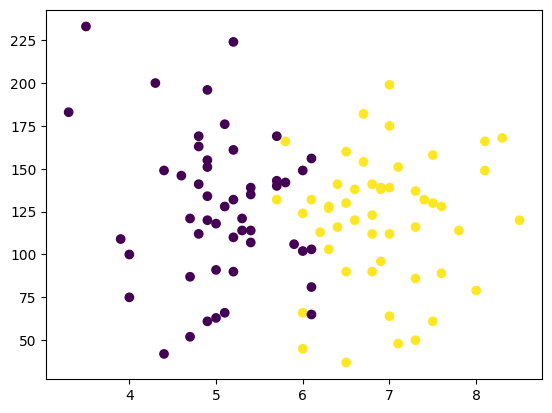

In [9]:
plt.scatter(df['cgpa'] , df['iq'] , c = df['placement'])

In [10]:
independent_var = df.iloc[ : , 0:2 ] 
independent_var

,sr no.,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [11]:
dependent_var = df.iloc[ : , -1 ]
dependent_var

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
independent_train , independent_test , dependent_train , dependent_test = train_test_split(independent_var , dependent_var , test_size = 0.1 )

In [13]:
independent_train

,sr no.,cgpa
31,31,3.9
19,19,5.2
15,15,5.1
10,10,6.0
46,46,5.3
...,...,...
78,78,6.1
24,24,4.7
3,3,7.4
30,30,7.6


In [14]:
independent_test

,sr no.,cgpa
0,0,6.8
41,41,5.4
51,51,4.8
60,60,6.9
97,97,6.7
82,82,6.5
90,90,7.3
91,91,7.5
80,80,4.9
92,92,5.2


In [15]:
dependent_train

31    0
19    0
15    0
10    1
46    0
     ..
78    0
24    0
3     1
30    1
54    1
Name: placement, Length: 90, dtype: int64

In [16]:
dependent_test

0     1
41    0
51    0
60    1
97    1
82    1
90    1
91    1
80    0
92    0
Name: placement, dtype: int64

In [17]:
# SCALE THE DATA 


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
independent_train = sc.fit_transform(independent_train)

In [21]:
independent_train

array([[-0.58438404, -1.79361601],
       [-1.01198212, -0.66597994],
       [-1.15451481, -0.75272117],
       [-1.33268068,  0.02794995],
       [-0.04988644, -0.5792387 ],
       [ 0.59151067,  0.89536232],
       [ 1.30417414, -0.23227376],
       [-1.2970475 ,  0.80862108],
       [-0.54875087,  0.89536232],
       [ 0.76967654,  2.19648087],
       [ 0.05701308, -0.49249746],
       [ 0.91220923, -0.92620365],
       [ 1.01910875, -0.92620365],
       [-1.22578116,  0.3749149 ],
       [ 0.5558775 ,  0.28817366],
       [ 1.37544048, -0.75272117],
       [ 1.48234   , -0.92620365],
       [ 1.83867174,  0.20143243],
       [ 1.6248727 ,  0.72187985],
       [ 0.98347558, -1.01294488],
       [ 0.84094289,  0.11469119],
       [-0.76254991,  0.89536232],
       [ 0.94784241,  0.63513861],
       [ 0.80530971,  0.28817366],
       [-1.61774606, -0.5792387 ],
       [-0.51311769,  0.02794995],
       [-1.54647972, -0.14553252],
       [ 0.87657606,  1.15558603],
       [ 1.73177222,

In [22]:
independent_test = sc.transform(independent_test)

In [23]:
independent_test

array([[-1.68901241,  0.72187985],
       [-0.22805231, -0.49249746],
       [ 0.12827942, -1.01294488],
       [ 0.44897798,  0.80862108],
       [ 1.76740539,  0.63513861],
       [ 1.23290779,  0.46165614],
       [ 1.51797318,  1.15558603],
       [ 1.55360635,  1.3290685 ],
       [ 1.16164145, -0.92620365],
       [ 1.58923952, -0.66597994]])

In [24]:
#  TRAIN OUR MODEL

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
clf.fit(independent_train , dependent_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [28]:
# EVALUATE MODEL

In [29]:
dependent_predict = clf.predict(independent_test)
dependent_predict

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0])

In [30]:
dependent_test

0     1
41    0
51    0
60    1
97    1
82    1
90    1
91    1
80    0
92    0
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score 

In [32]:
accuracy_score(dependent_test , dependent_predict)

1.0

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm = confusion_matrix(dependent_test , dependent_predict)
cm

array([[4, 0],
       [0, 6]])

In [36]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(dependent_test , dependent_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [42]:
import pickle

In [44]:
final_model = LogisticRegression()
final_model.fit(independent_var, dependent_var)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [45]:
import pickle

with open("placement_model.pkl", "wb") as f:
    pickle.dump(final_model, f)


In [46]:
with open("placement_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [47]:
# Example: cgpa = 6.8, iq = 120
loaded_model.predict([[6.8, 120]])

c:\Users\ishar\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])